#0 - Introdução

**Objetivo**

Visamos desenvolver análise para compreender melhor e prever a ocorrência de churn no contexto de telecon, e assim conseguir auxiliar ao desenvolvimento de estratégias que permitam mitigar churn e, consequentemente, potencializar a receita da empresa.

Também é de nosso interesse responder perguntas tais como:

- Ter dependentes tem impacto no churn?
- O estado civil do cliente impacta o churn?
- Quais tipos de contratos resultam em maior permanencia no serviço da empresa?
- O gênero e idade impactam no churn?

#1 - Bibliotecas

In [1]:
#Análise de dados
import pandas as pd
import numpy as np

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt
#import sweetviz as sv # !pip install sweetviz

#Modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


## Configurações ##
pd.set_option("max_colwidth", 1000)
pd.options.display.float_format = "{:,.2f}".format
pd.options.plotting.backend = "matplotlib"
plt.style.use("ggplot")


In [2]:
#Leitura do arquivo contendo os dados
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2 - Visão geral e primeiras Inspecções


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Informações sobre as features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
#Informação estatística preliminar
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,"7,043.00",7043,7043,"7,043.00",7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,"7,043.00",7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.16,NaN,NaN,32.37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.76,NaN,NaN
std,NaN,NaN,0.37,NaN,NaN,24.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.09,NaN,NaN
min,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25,NaN,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,NaN,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,NaN,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.85,NaN,NaN


In [7]:
#Verificando para dados faltantes
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#df['TotalCharges'].replace(" ", "0", inplace=True)
#df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
#Não são missing exatamente, são 'espaços'. Possível erro de digitação.
df['TotalCharges'].loc[df['TotalCharges'] == ' ']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [10]:
df["TotalCharges"].min()

' '

OBSERVAÇÃO: Existe algum valor vazio na feature TotalCharges, a substituição acima resolve o problema, mas ela só será usada depois do split. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


DICIONÁRIO DE DADOS

  

*   CustomerID - ID do cliente
*   gender - Sexo do cliente, F ou M

*   SeniorCitizen - se o cliente é idoso ou não (1 ou 0)
*   Partner - Se o cliente tem parceiro ou não  (1 ou 0)

*   Dependents - Se o cliente tem dependentes ou não (1 ou 0)

*   Tenue - Número de meses que o cliente permaneceu na companhia
*   PhoneService - Se o cliente tem serviço telefônico (Sim ou Não)


*   MultipleLines - Se o cliente tem multiplas linhas ou não (Não, sim ou Sem seviço de telefonia)

*   InternetService - Provedor de internet do cliente (DSL, Fibra optica ou não)

*   OnlineSecurity - Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de internet)
*   OnlineBackup - Se o cliente tem backup online ou não (Sim, Não, Sem serviço de internet)


*   DeviceProtection - Se o cliente tem proteção do dispositivo ou não (Sim, Não, Sem serviço de internet)

*   TechSupport - Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de internet)

*   StreamingTV - Se o cliente tem steaming de TV ou não (Yes, No, No internet service)

*   StreamingMovies - Se o cliente tem streaming de filmes ou não (Sim, Não, Sem serviço de internet)
*   Contract - O prazo do contrato do cliente (mês a mês, um ano, dois anos)

*   PaperlessBilling - Se o cliente tem faturamento sem papel ou não (Sim, Não)


*   PaymentMethod - O método de pagamento do cliente (Cheque eletrônico, Cheque enviado, Transferência bancária (automática), Cartão de crédito (automático))


*   MontlyCharges - O valor cobrado do cliente mensalmente
*   TotalCharges - O valor total cobrado do cliente


*   Churn (Target) - Se o cliente se desligou ou não (Sim ou Não)














#2 - Análise exploratória univariada



array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

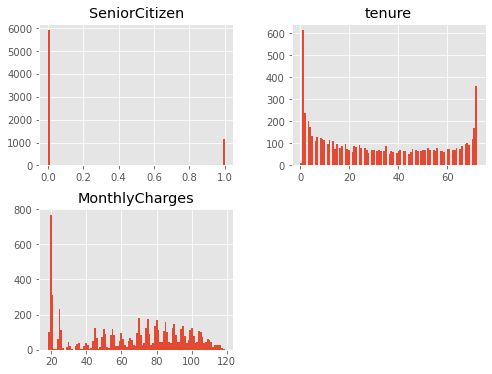

In [12]:
#Visualisação geral do dataframe
df.hist(bins=100, figsize = [8,6])

Gênero

Sexo dos clientes, masculino ou feminino. Categórico. 

In [13]:
df["gender"]


0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

In [14]:
#Informações gerais
df["gender"].describe()


count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

In [15]:
#Contagem por gênero
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0, 0.5, 'Frequência')

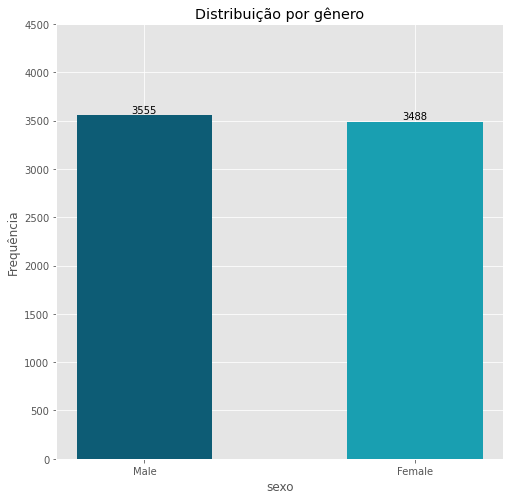

In [16]:
height = list(df["gender"].value_counts())
x_value = list(df["gender"].value_counts().index)

#plot
bar_width = 0.5
fig, ax = plt.subplots(figsize=[8,8])
bar_plot = ax.bar(x_value, height, bar_width, color=['#0d5c75','#199fb1'])

plt.ylim([0,4500])
plt.bar_label(bar_plot)
plt.title('Distribuição por gênero')
plt.xlabel('sexo')
plt.ylabel('Frequência')


A distribuição de gênero parece balanceada nos dados presentes.

#Idosos

Se é idoso ou não (1 ou 0). Variável categórica.

In [17]:
df["SeniorCitizen"]

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [18]:
df["SeniorCitizen"].dtypes

dtype('int64')

In [19]:
#contagem de clientes idosos
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

([<matplotlib.axis.XTick at 0x7f1f1b485fd0>,
 [Text(0, 0, 'Não-idoso'), Text(1, 0, 'Idoso')])

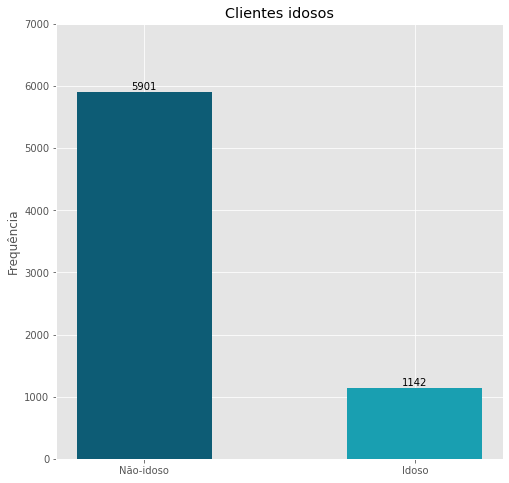

In [20]:
height = list(df["SeniorCitizen"].value_counts())
x_value = list(df["SeniorCitizen"].value_counts().index)

#plot
bar_width = 0.5
fig, ax = plt.subplots(figsize=[8,8])
bar_plot = ax.bar(x_value, height, bar_width, color=['#0d5c75','#199fb1'])

plt.bar_label(bar_plot)
plt.ylim([0, 7000])
plt.title('Clientes idosos')
plt.ylabel('Frequência')
plt.xticks(np.arange(2), ['Não-idoso', 'Idoso'])



Temos 5901 clientes não-idosos e 1142 idosos, os quais representam ~16% dos clientes.

#Parceiro

Se o cliente tem, ou não, parceiro (yes ou no). Variável categórica.

Hipótese: ter parceiro influencia o churn. (explorado na análise multivariada)

In [21]:
df["Partner"]

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object

In [22]:
#Informações gerais
df["Partner"].describe()

count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

Maior ocorrência de clientes solteiros.

In [23]:
#Contagem de clientes com parceiro
cont_parceiros = df["Partner"].value_counts()

Text(0, 0.5, 'frequência')

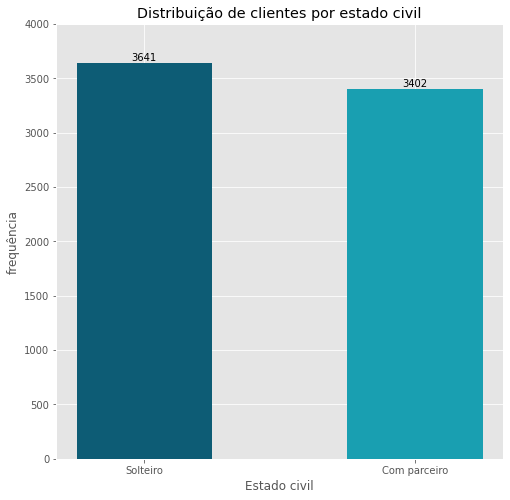

In [24]:
bar_altura = list(cont_parceiros)
x_valores = list(cont_parceiros.index)

#plot 
bar_larg = 0.5
fig, ax = plt.subplots(figsize=[8,8])
bar_plot = ax.bar(x_valores, bar_altura, bar_larg, color=['#0d5c75','#199fb1'])

plt.bar_label(bar_plot)
plt.ylim([0,4000])
plt.title('Distribuição de clientes por estado civil')
plt.xticks(np.arange(2), ['Solteiro', 'Com parceiro']) #mudando o rótulos dos valores xplt.xlabel('Estado civil')
plt.xlabel('Estado civil')
plt.ylabel('frequência')

A distribuição de clientes com parceiro é bem balanceada.


Há uma predominância de clientes solteiros. Essa diferença deve ser levada em consideração para futuros insights.

#Dependents

Se o cliente tem dependentes ou não (1 ou 0). Variável categórica.

**Hipótese**: ter ou não dependentes influencia o churn. (explorado na análise bivariada).

In [25]:
df['Dependents']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [26]:
#estatísticas básicas
df['Dependents'].describe()

count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object

In [27]:
#contagem de clientes com dependentes
cont_depend = df['Dependents'].value_counts()
cont_depend

No     4933
Yes    2110
Name: Dependents, dtype: int64

Text(0, 0.5, 'frequência')

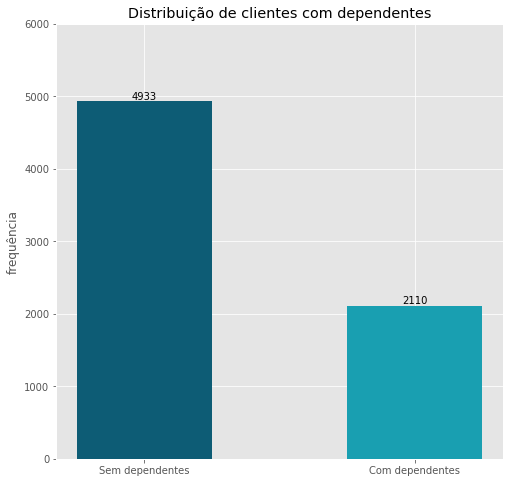

In [28]:
#plotando
bar_altura_depend = list(cont_depend)
x_valores_depend = list(cont_depend.index)

#barras
bar_larg = 0.5
fig, ax = plt.subplots(figsize=[8,8])
bar_plot_depend = ax.bar(x_valores_depend, bar_altura_depend, bar_larg, color=['#0d5c75','#199fb1'])

plt.bar_label(bar_plot_depend)
plt.ylim([0,6000])
plt.title('Distribuição de clientes com dependentes')
plt.xticks(np.arange(2), ['Sem dependentes', 'Com dependentes']) #mudando o rótulos dos valores x
plt.ylabel('frequência')

Há uma diferença considerável entre clientes com dependentes e sem.

#Tenure

Número de meses que o cliente permaneceu na companhia - variável discreta numérica. 

Obs: diretamente relacionada com a variável contract.

In [29]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [30]:
#Estatística báscia da feature
df['tenure'].describe()

count   7,043.00
mean       32.37
std        24.56
min         0.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: tenure, dtype: float64

Clientes permanecem em média 32 meses no serviço. O que equivale a aproximadamente 2,6 anos.

Text(0.5, 0, 'Meses')

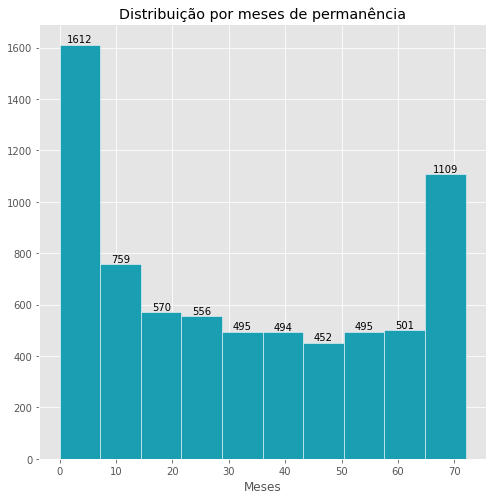

In [31]:
#Plotando
plt.figure(figsize = [8,8])
counts, edges, bars = plt.hist(df.tenure, edgecolor = 'white',
                               color = ['#199fb1'])

plt.bar_label(bars)

plt.title('Distribuição por meses de permanência')
plt.xlabel('Meses')

In [32]:
#Quantos ocorrências de até 1 mês?
df["tenure"].loc[df["tenure"] == 1].count()

613

Ao menos 624 clientes ficaram apenas 1 mês ou menos na empresa.

In [33]:
#E mais de 1 ano?
df["tenure"].loc[df["tenure"] >= 12].count()

4974

4974 clientes ficaram ao menos 1 ano no serviço. 

Aparentemente a contagem contínua dos meses de permanência pode não ser suficiente por si, uma vez que os clientes estão sujeitos a três tipos específicos de contratos, as duas features parecem ser melhor entendidas juntas.

In [34]:
df["tenure"].loc[df["tenure"] == 72].count()

362

362 clientes permaneceram (até a data de coleta dos dados) 72 meses no serviço, o que equivale a 6 anos. São clientes já fidelizados.

Pergunta: 

Qual a porcentagem de clientes com mais de 2 anos? 

In [35]:
#porcentagem de clientes há mais de 2 anos com a empresa
client_count_2anos = df["tenure"].loc[df["tenure"] >= 24].count()
client_count_2anos

3927

In [36]:
porcent_client_2anos = (client_count_2anos/df["customerID"].count())*100
porcent_client_2anos

55.75748970609116

55.7% dos clientes no conjunto de dados permaneceram 2 anos ou mais na empresa. 


#PhoneService

Se o cliente tem serviço telefônico (Sim ou Não). Categórica.

In [37]:
df["PhoneService"]

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: object

In [38]:
#Estatística básica
df["PhoneService"].describe()

count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object

Uma parcela consideravelmente maior dos clientes têm serviço de telefonia.

In [39]:
#90% dos clientes têm serviço de telefonia
df["PhoneService"].value_counts(1)

Yes   0.90
No    0.10
Name: PhoneService, dtype: float64

In [40]:
#Contagem
PhoneService_count = df.groupby("PhoneService")["customerID"].count()
PhoneService_count

PhoneService
No      682
Yes    6361
Name: customerID, dtype: int64

NameError: ignored

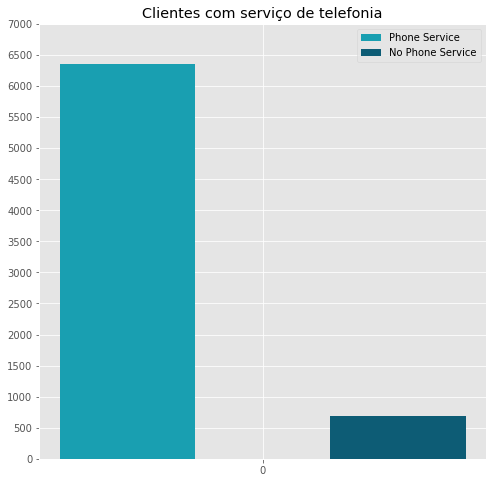

In [41]:
#plotando

indx = np.arange(0,1)
scale_PService = np.arange(0, 7500, 500)
pService_list = list(PhoneService_count)
PhoneService_no = pService_list[0]
PhoneService_yes = pService_list[1]

#criando barras
bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])
PhoneService_yes_bar = ax.bar(indx - bar_width, PhoneService_yes, bar_width, label = "Phone Service", color = ['#199fb1'])
PhoneService_no_bar = ax.bar(indx + bar_width, PhoneService_no, bar_width, label = "No Phone Service", color = ['#0d5c75'] )

plt.title("Clientes com serviço de telefonia")
ax.set_xticks(indx)
ax.set_yticks(scale_PService)
plt.legend()

#labels

addlabels_bars(PhoneService_yes_bar)
addlabels_bars(PhoneService_no_bar)

plt.show()

Como visto quase todos os clientes no conjunto de dados têm serviço de telefonia. Resultado já esperado.

#MultipleLines

Se o cliente tem multiplas linhas ou não (Não, sim ou Sem seviço de telefonia). Variável categórica.

In [ ]:
df["MultipleLines"]

In [ ]:
df["MultipleLines"].describe()

In [ ]:
df["MultipleLines"].value_counts()

In [ ]:
#contagem de valores únicos
MultipleLines_count = df.groupby("MultipleLines")["customerID"].count()
MultipleLines_count

In [ ]:
#plot

indx = np.arange(0,1)
scale_multlines = np.arange(0,4500,500)
MultipleLines_count_list = list(MultipleLines_count)
MultipleLines_count_no = MultipleLines_count_list[0]
MultipleLines_count_yes = MultipleLines_count_list[2]
No_phone_service = MultipleLines_count_list[1]

#Barras

bar_width = 0.1
fig, ax = plt.subplots(figsize=[8,8])
MultipleLines_no_bar = ax.bar(indx-2*bar_width, MultipleLines_count_no, bar_width, label = "No multiplelines", color = ["#0d5c75"])
MultipleLines_yes_bar = ax.bar(indx, MultipleLines_count_yes, bar_width, label = "Multiplelines", color = ["#199fb1"])
no_phone_lines_bar = ax.bar(indx+2*bar_width, No_phone_service, bar_width, label = "No phone lines", color = ["#a5d1e1"])

plt.title("Contagem de clientes com múltiplas linhas")
ax.set_xticks(indx)
ax.set_yticks(scale_multlines)
plt.legend()

#Labels

addlabels_bars(MultipleLines_no_bar)
addlabels_bars(MultipleLines_yes_bar)
addlabels_bars(no_phone_lines_bar)


#InternetService 

Provedor de internet do cliente (DSL, Fibra optica ou não). Variável categórica. 

In [ ]:
df['InternetService']

In [ ]:
df['InternetService'].describe()

In [ ]:
#valores únicos
df['InternetService'].unique()

In [ ]:
#contagem
df['InternetService'].value_counts(1)

Maior parte dos clientes (44%) tem serviço de internet por fibra óptica, consideravelmente maior que DSL.

In [ ]:
count_inter_service = df.groupby("InternetService")["customerID"].count()
count_inter_service

In [ ]:
#Dados

indx = np.arange(0,1)
scale_internetservice = np.arange(0, 4500, 500)
list_internetservice = list(count_inter_service)
count_fiber = list_internetservice[1]
count_DSL = list_internetservice[0]
count_no = list_internetservice[2]

#criando barras

bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])
fiber_bar = ax.bar(indx-2*bar_width, count_fiber, bar_width, label = "Fibra", color = ['#0d5c75'])
DSL_bar = ax.bar(indx, count_DSL, bar_width, label = "DSL", color = ['#199fb1'])
No_inteserv_bar = ax.bar(indx+2*bar_width, count_no, bar_width, label = "Sem serviço", color = ['#a5d1e1'])

#configurando 

plt.title("Clientes com serviço de internet")
plt.legend()
ax.set_xticks(indx)
ax.set_yticks(scale_internetservice)

#labels

addlabels_bars(fiber_bar)
addlabels_bars(DSL_bar)
addlabels_bars(No_inteserv_bar)

plt.show()



#OnlineSecurity

Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de internet). Variável categórica.

In [ ]:
df["OnlineSecurity"]

In [ ]:
df["OnlineSecurity"].describe()

Maioria dos clientes não tem serviço de segurança online.

In [ ]:
df["OnlineSecurity"].value_counts(1)

In [ ]:
#contagem
count_onlinesec = df.groupby("OnlineSecurity")["customerID"].count()
count_onlinesec

In [ ]:
#Visualizando
indx = np.arange(0,1)
scale_onlinesec = np.arange(0, 4500, 500)
list_onlinesec = list(count_onlinesec)
no_online_security = list_onlinesec[0]
online_security = list_onlinesec[2]
no_internet = list_onlinesec[1]

#criando barras

bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])
no_security_bar = ax.bar(indx-2*bar_width, no_online_security, bar_width, label = "Sem segurança online", color = ['#0d5c75'])
security_bar = ax.bar(indx, online_security, bar_width, label = "Segurança online", color = ['#199fb1'])
No_inteserv_bar = ax.bar(indx+2*bar_width, no_internet, bar_width, label = "Sem internet", color = ['#a5d1e1'])

#configurando 

plt.title("Clientes com serviço de segurança online")
plt.legend()
ax.set_xticks(indx)
ax.set_yticks(scale_onlinesec)

#labels

addlabels_bars(no_security_bar)
addlabels_bars(security_bar)
addlabels_bars(No_inteserv_bar)

plt.show()


Serviço de segurança online não é algo popular entre os clientes. 

#OnlineBackup

 OnlineBackup - Se o cliente tem backup online ou não (Sim, Não, Sem serviço de internet).

In [ ]:
df["OnlineBackup"]

In [ ]:
df["OnlineBackup"].describe()

Resultados bastante parecidos com o caso de segurança online, aparentemente também não é um serviço popular entre clientes.

In [ ]:
df["OnlineBackup"].unique()

In [ ]:
df["OnlineBackup"].value_counts(1)

In [ ]:
#contagem
count_backup = df.groupby("OnlineBackup")["customerID"].count()
count_backup

In [ ]:
#plotando

indx = np.arange(0,1)
scale_backup = np.arange(0,4500, 500)
list_count_backup = list(count_backup)
backup_no = list_count_backup[0]
backup_yes = list_count_backup[2]
no_internet = list_count_backup[1]
#criando barras

bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])
backup_no_bar = ax.bar(indx-2*bar_width, backup_no, bar_width, label = "Sem backup online", color = ['#0d5c75'])
backup_yes_bar = ax.bar(indx, backup_yes, bar_width, label = "Backup online", color = ['#199fb1'])
no_internet_bar = ax.bar(indx+2*bar_width, no_internet, bar_width, label = "Sem internet", color = ['#a5d1e1'])

#configurando 

plt.title("Clientes com serviço de backup online")
plt.legend()
ax.set_xticks(indx)
ax.set_yticks(scale_backup)

#labels

addlabels_bars(backup_no_bar)
addlabels_bars(backup_yes_bar)
addlabels_bars(no_internet_bar)

plt.show()

Apesar de ainda uma maioria não ter serviço de backup, é ele mais popular entre os clientes que o serviço de segurança online. 

#DeviceProtection

DeviceProtection - Se o cliente tem proteção do dispositivo ou não (Sim, Não, Sem serviço de internet). Variável categórica.

In [ ]:
df["DeviceProtection"]

In [ ]:
df["DeviceProtection"].unique()

Mais uma feature com 'no internet service', provavelmente todas as features relativas a segurança do cliente terão.

In [ ]:
df["DeviceProtection"].describe()

In [ ]:
#porcentagem
df["DeviceProtection"].value_counts(1)

In [ ]:
count_dev_protec = df.groupby('DeviceProtection')["customerID"].count()
count_dev_protec

In [ ]:
#plotando

indx = np.arange(0,1)
scale_DeviceProtection = np.arange(0,4500, 500)
list_count_dev_protec = list(count_dev_protec)
dev_protec_no = list_count_dev_protec[0]
dev_protec_yes = list_count_backup[2]
no_internet = list_count_dev_protec[1]
#criando barras

bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])
dev_protec_no_bar = ax.bar(indx-2*bar_width, dev_protec_no, bar_width, label = "Sem proteção de dispositivo", color = ['#0d5c75'])
dev_protec_yes = ax.bar(indx, dev_protec_yes, bar_width, label = "Proteção de dispositivo", color = ['#199fb1'])
no_internet_bar = ax.bar(indx+2*bar_width, no_internet, bar_width, label = "Sem internet", color = ['#a5d1e1'])

#configurando 

plt.title("Clientes com serviço de proteção de dispositivo")
plt.legend()
ax.set_xticks(indx)
ax.set_yticks(scale_DeviceProtection)

#labels

addlabels_bars(dev_protec_no_bar)
addlabels_bars(dev_protec_yes)
addlabels_bars(no_internet_bar)

plt.show()

#TechSupport

Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de internet). Variável categórica.

In [ ]:
df["TechSupport"]

In [ ]:
#valores únicos
df["TechSupport"].unique()

In [ ]:
#estatística geral
df["TechSupport"].describe()

A maioria dos clientes não assina suporte técnico. Aparentemente é uma tendência no que diz respeito a serviços de segurança.

In [ ]:
df["TechSupport"].value_counts(1)

In [ ]:
#contagem
count_Tech_Sup = df.groupby("TechSupport")["customerID"].count()
count_Tech_Sup

In [ ]:
#Plotando

indx = np.arange(0,1)
scale_tec_sup = np.arange(0,4500, 500)
list_tech_sup = list(count_Tech_Sup)
tec_sup_no = list_tech_sup[0]
tec_sup_yes = list_tech_sup[2]
no_internet = list_tech_sup[1]
#criando barras

bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])

tech_sup_no_bar = ax.bar(indx-2*bar_width, tec_sup_no, bar_width, label = "Sem suporte técnico", color = ['#0d5c75'])
tech_sup_yes = ax.bar(indx, tec_sup_yes, bar_width, label = "Suporte técnico", color = ['#199fb1'])
no_internet_bar = ax.bar(indx+2*bar_width, no_internet, bar_width, label = "Sem internet", color = ['#a5d1e1'])

#configurando 

plt.title("Clientes com suporte técnico")
plt.legend()
ax.set_xticks(indx)
ax.set_yticks(scale_tec_sup)

#labels

addlabels_bars(tech_sup_no_bar)
addlabels_bars(tech_sup_yes)
addlabels_bars(no_internet_bar)

plt.show()

Os serviços de segurança são bastante presentes entre os clientes, mas em todos os casos (tipos de serviços de segurança) a norma é não tê-los. Talvez oferecer algum tipo de serviço de segurança em conjunto seja uma estratégia interessante. A análise bivariada poderá produzir melhores insights.

##StreamingTV

 Se o cliente tem steaming de TV ou não (Yes, No, No internet service). Variável categórica.

In [ ]:
df["StreamingTV"]

In [ ]:
#valores únicos
df["StreamingTV"].unique()

In [ ]:
#porcentagem
porcent_count_streaming = df["StreamingTV"].value_counts(1)
porcent_count_streaming

In [ ]:
count_streaming = df["StreamingTV"].value_counts()
count_streaming

In [ ]:
#Visualizando

indx = np.arange(0,1)
scale_streaming = np.arange(0,4000, 500)
list_count_streaming = list(count_streaming)
streaming_no = list_count_streaming[0]
streaming_yes = list_count_streaming[1]
no_internet = list_count_streaming[2]

#criando barras

bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])

streaming_no_bar = ax.bar(indx-2*bar_width, streaming_no, bar_width, label = "Sem streaming", color = ['#0d5c75'])
streaming_yes = ax.bar(indx, streaming_yes, bar_width, label = "Com streaming", color = ['#199fb1'])
no_internet_bar = ax.bar(indx+2*bar_width, no_internet, bar_width, label = "Sem internet", color = ['#a5d1e1'])

#configurando 

plt.title("Clientes com streming de TV")
plt.legend()
ax.set_xticks(indx)
ax.set_yticks(scale_streaming)

#labels

addlabels_bars(streaming_no_bar)
addlabels_bars(streaming_yes)
addlabels_bars(no_internet_bar)

plt.show()

Streaming de tv é um serviço popular dentre os clientes. 

##Streaming Movies

Se o cliente tem streaming de filmes ou não (Sim, Não, Sem serviço de internet).Variável categórica.

In [ ]:
df["StreamingMovies"]

In [ ]:
#info estatísticas gerais
df["StreamingMovies"].describe()

In [ ]:
df["StreamingMovies"].unique()

In [ ]:
#contagem
count_streaming_M = df["StreamingMovies"].value_counts()
count_streaming_M

In [ ]:
#Visualizando

indx = np.arange(0,1)
scale_streaming_M = np.arange(0,4000, 500)
list_count_streaming_M = list(count_streaming_M)
count_streaming_M_no = list_count_streaming_M[0]
count_streaming_M_yes = list_count_streaming_M[1]
no_internet = list_count_streaming_M[2]

#criando barras

bar_width = 0.1
fig, ax = plt.subplots(figsize = [8,8])

streaming_M_no_bar = ax.bar(indx-2*bar_width, count_streaming_M_no, bar_width, label = "Sem streaming de filmes", color = ['#0d5c75'])
streaming_M_yes = ax.bar(indx, count_streaming_M_yes, bar_width, label = "Com streaming de filmes", color = ['#199fb1'])
no_internet_bar = ax.bar(indx+2*bar_width, no_internet, bar_width, label = "Sem internet", color = ['#a5d1e1'])

#configurando 

plt.title("Clientes com streming de filmes")
plt.legend()
ax.set_xticks(indx)
ax.set_yticks(scale_streaming_M)

#labels

addlabels_bars(streaming_M_no_bar)
addlabels_bars(streaming_M_yes)
addlabels_bars(no_internet_bar)

plt.show()

Praticamente metade dos clientes com serviço de internet assinam serviço de streaming de filmes.

Serviços de streaming tanto de TV quanto de filmes são bastante populares entre os clientes de modo que ~50% dos clientes com internet têm serviços de streaming.

##Contract

O prazo do contrato do cliente (mês a mês, um ano, dois anos). Variável categórica.

In [ ]:
df["Contract"]

In [ ]:
#Estatística geral
df["Contract"].describe()

In [ ]:
df["Contract"].unique()

In [ ]:
#sem dados nulos
df["Contract"].isnull().sum()

In [ ]:
count_contract = df["Contract"].value_counts()
count_contract

In [ ]:
#Visualizando 

indx = np.arange(0,1)
scale_contract = np.arange(0, 4500, 500)
list_count_contract = list(count_contract)
month_to_month = list_count_contract[0]
two_year = list_count_contract[1]
one_year = list_count_contract[2]

#barras

bar_width = 0.1
fig , ax = plt.subplots(figsize = [8,8])
month_to_month_bar = ax.bar(indx-2*bar_width, month_to_month, bar_width, label = "Mensal", color = ['#0d5c75'])
one_year_bar =  ax.bar(indx, one_year, bar_width, label = "Anual", color = ['#a5d1e1'])
two_year_bar =  ax.bar(indx+2*bar_width, two_year, bar_width, label = 'bianual', color = ['#199fb1']) 
#config

plt.title("Clientes por tipo de contrato")
plt.legend()
plt.ylabel("Frequência")
ax.set_xticks(indx)
ax.set_yticks(scale_contract)

#Labels

addlabels_bars(month_to_month_bar)
addlabels_bars(one_year_bar)
addlabels_bars(two_year_bar)



plt.show()





Contratos mensais (mês a mês) são aparentemente muito preferidos pelos clientes. 

**Pergunta**: Isso indica ocorrência de clientes novos conhecendo o serviço ou é uma preferência até entre clientes já fidelizados?

#PaperlessBilling

 Se o cliente tem faturamento sem papel ou não (Sim, Não).

In [ ]:
df["PaperlessBilling"]

In [ ]:
df["PaperlessBilling"].describe()

In [ ]:
#Porcentagem
df["PaperlessBilling"].value_counts(1)

Aproximandamente metade dos clientes têm fatura sem papel (digital).

##PaymentMethod

O método de pagamento do cliente (Cheque eletrônico, Cheque enviado, Transferência bancária (automática), Cartão de crédito (automático)).

In [ ]:
df["PaymentMethod"]

In [ ]:
df["PaymentMethod"].isnull().sum()

In [ ]:
#métodos de pagamento mais populares
paymant_method_count = df["PaymentMethod"].value_counts()
paymant_method_count

In [ ]:
list(paymant_method_count)

In [ ]:
plt.figure(figsize=[8,8])
barplot = plt.bar(x = list(paymant_method_count.index), height = list(paymant_method_count),
                      color =['#0d5c75','#199fb1', '#a5d3e1', '#a5d1e1'])

plt.bar_label(barplot, labels= list(paymant_method_count), padding=2)
plt.ylim([0, 3000])

plt.title("Formas de pagamento mais comuns")
plt.ylabel("Frequência")
plt.xticks(rotation=-50)


##MonthlyCharges

MontlyCharges - O valor cobrado do cliente mensalmente. Variável numérica contínua (float).

In [ ]:
df["MonthlyCharges"]

In [ ]:
#estatística geral
df["MonthlyCharges"].describe()

A média de valor pago mensalmente pelos clientes é de 64,76.

In [ ]:
df["MonthlyCharges"].isna().sum()

In [ ]:
df["MonthlyCharges"].nunique()

In [ ]:
df["MonthlyCharges"].loc[df["MonthlyCharges"] <= 64.76].count()

3120 clientes pagam por mês valor menor que a média.

In [ ]:
df["MonthlyCharges"].loc[df["MonthlyCharges"] > 64.76].count()

3923 clientes pagam por mês valor maior que a média. 

In [ ]:
#plotando a distribuição da feature
plt.figure(figsize=[8,8])
counts, edges, bars = plt.hist(df["MonthlyCharges"],
                               edgecolor="white", color = ['#199fb1'])
plt.ylim([0,1700])
plt.bar_label(bars)
plt.title('Distribuição de pagamentos mensais')
plt.xlabel('valor mensal')
plt.ylabel('Faixa de frequência')
  

  

In [ ]:
df["MonthlyCharges"].value_counts()

Mensalidades mais baixas são mais comuns

In [ ]:
df.groupby(['PaymentMethod','Churn'], as_index=False)['customerID'].count()

In [ ]:
df.groupby(['Contract','tenure'], as_index=False)['customerID'].count()

In [ ]:
contratos_mensais = df.loc[df["Contract"] == 'Month-to-month']

In [ ]:
contratos_mensais.Contract.loc[contratos_mensais["tenure"] == 24].count()

In [ ]:
df_contract_churn = df.groupby(['Contract','Churn'], as_index=False)['customerID'].count()
df_contract_churn

In [ ]:
type(df_contract_churn)

In [ ]:
df.columns